In [19]:
import os

WDIR = '/Users/danielhasegan/workspace/netpyne-project/results/20210629'

evaluations = [(os.path.join(WDIR, fname), int(fname.replace('evaluation_', ''))) for fname in os.listdir(WDIR) if fname.startswith('evaluation_')]

In [20]:
import csv

results = {}
for eval_dir, eval_ts in evaluations:
    with open(os.path.join(eval_dir, 'ActionsPerEpisode.txt')) as f:
        results[eval_ts] = [int(float(eps)) for _,eps in csv.reader(f, delimiter='\t')]

In [21]:
import pickle as pkl

with open(os.path.join(WDIR, 'synWeights.pkl'), 'br') as f:
    synWeights = pkl.load(f)
    
preid = list(synWeights.keys())[0]
postid = list(synWeights[preid].keys())[0]

steps = len(synWeights[preid][postid])
ts = [s for s,v in synWeights[preid][postid]]

In [22]:
sorted_results = sorted(list(results.items()), key=lambda x:x[0])

labels = [k for k,v in sorted_results]
data = [v for k,v in sorted_results]

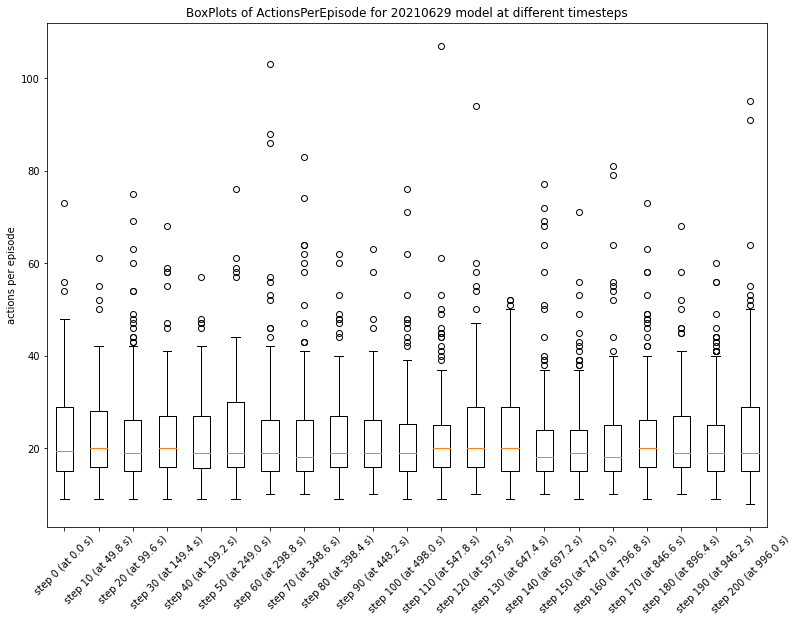

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(
    ['step {} (at {} s)'.format(l, round(ts[l] / 1000, 4)) for l in labels],
    rotation = 45)

ax.set_ylabel('actions per episode')

ax.set_title('BoxPlots of ActionsPerEpisode for 20210629 model at different timesteps')

# show plot
plt.show()